<a href="https://colab.research.google.com/github/Mpitsiali/MAI645_as1/blob/main/main_nearest_neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME = '/content/drive/MyDrive/MAI645'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Training split
x_train = x_train
y_train = y_train

# Test split
x_test = x_test[:1000]
y_test = y_test[:1000]

print('Train: ', x_train.shape)
print('Test classes: ', np.unique(y_train))

Train:  (60000, 28, 28)
Test classes:  [0 1 2 3 4 5 6 7 8 9]


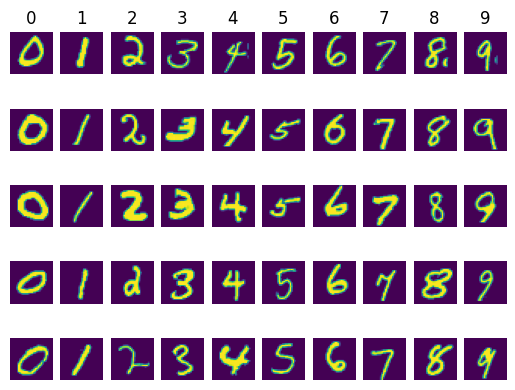

In [ ]:
# Run to display example images per class
import matplotlib.pyplot as plt
import numpy as np

classes = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
import os
import pickle
from abc import ABC, abstractmethod
import numpy as np


class NearestNeighborsNet():
    """
    Nearest Neighbors Network
    """

    def __init__(self):
        """
        :param model_name: A descriptive name of the model
        """
        super().__init__()
        self.model_name = 'knn_net'
        pass

    def train(self, X, y):
      """
      The nearest neighboor classifier just memorizing the training data
      """
      ########################################################################
      # TODO                                                                 #
      # Use numpy to reshape the image data set to a numpy array of shape    #
      # (num_samples, D).                                                    #
      # Store the training set to the appropriate self variables             #
      #                                                                      #
      ########################################################################

      # self.X_train = None
      # self.y_train = None

      num_samples = X.shape[0]
      D = np.prod(X.shape[1:])
      self.X_train = X.reshape(num_samples, D)
      self.y_train = y

      ########################################################################
      #                           END OF YOUR CODE                           #
      ########################################################################


    def compute_distances(self, X):
      """
      Compute the distance between each test point in X and each training point
      in self.X_train, store the resulted distances in array dists
      """
      num_test = X.shape[0]
      num_train = self.X_train.shape[0]
      dists = np.zeros((num_test, num_train))
      for i in range(num_test):
        #######################################################################
        # TODO:                                                               #
        # Compute the L2 distance between the ith test point X and all        #
        # training  points self.X_train, and store the result in dists.       #
        #######################################################################



        dists[i, :] = np.sqrt(np.sum((self.X_train - X[i, :])**2, axis=1))



        #######################################################################
        #                         END OF YOUR CODE                            #
        #######################################################################
      return dists

    def predict_labels(self, dists, k=1):
      """
      Given a matrix of distances between test points and training points,
      predict a label for each test point.

      Inputs:
      - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
        gives the distance betwen the ith test point and the jth training point.

      Returns:
      - y: A numpy array of shape (num_test,) containing predicted labels for the
        test data, where y[i] is the predicted label for the test point X[i].
      """
      num_test = dists.shape[0]
      y_pred = np.zeros(num_test)
      for i in range(num_test):

          #####################################################################
          # TODO: Compute the appropriate class by considering k neighboors   #
          #####################################################################

          k_nearest = np.argsort(dists[i, :])[:k]

          closest_y = self.y_train[k_nearest]

          # np.bincount()is used t count the number of occurrences of each value in the array
          # Select and store the majority class
          y_pred[i] = np.argmax(np.bincount(closest_y))
          #####################################################################
          #                         END OF YOUR CODE                          #
          #####################################################################
      return y_pred

    def __repr__(self):
        return "A dummy machine"

In [ ]:
########################################################################
# TODO: Initialize NearestNeighborsNet class                           #
########################################################################

# Initialize classifier
net = NearestNeighborsNet()

########################################################################
#                           END OF YOUR CODE                           #
########################################################################


In [ ]:

# TODO: Implement the train function for NearestNeighborsNet class     #
# in nearest_neighboors.py file                                        #
net.train(x_train, y_train)

print(net.X_train.shape)
print(net.y_train.shape)

assert net.y_train.shape == (y_train.shape[0],), "Wrong dimensions for y_train"
assert net.X_train.shape == (x_train.shape[0], 784), "Wrong dimensions for x_train"

(60000, 784)
(60000,)


We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:

1. First we must compute the distances between all test examples and all train examples.
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

Implement the function `compute_distances` in NearestNeighborsNet class to compute the distance matrix.

In [ ]:
# TODO: Complete compute distances function in NearestNeighborsNet class
dists = net.compute_distances(x_test.reshape(x_test.shape[0], -1))

In [ ]:
print('distance matrix shape: ', dists.shape)
assert dists.shape == (x_test.shape[0], x_train.shape[0]), "Wrong dimensions for distance matrix"


distance matrix shape:  (1000, 60000)


In [ ]:
# TODO:Now implement the function predict_labels in NearestNeighborsNet class and run the code below:
# We use 1 neighboor to compute the predictions' class(k=1).
y_test_pred = net.predict_labels(dists, k=1)

num_test = x_test.shape[0]
########################################################################
# TODO: Compute Accuracy of the 1-NN classifier(must be close to ~26 %)#
########################################################################
num_correct = None

accuracy = None

# Count how many predictions match the true labels
num_correct = np.sum(y_test_pred == y_test)

# Compute the accuracy as the proportion of correct predictions
accuracy = num_correct / num_test

########################################################################
#                         END OF YOUR CODE                             #
########################################################################

print('Got {} / {} correct => accuracy: {:.3f}'.format(num_correct, num_test, accuracy))

Got 260 / 1000 correct => accuracy: 0.260


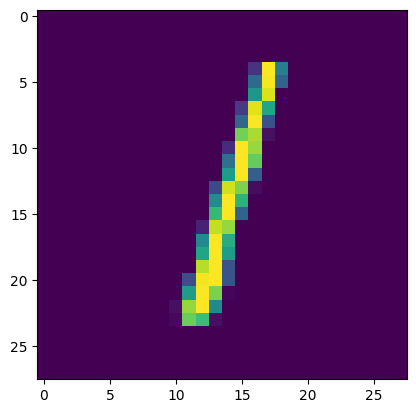

The prediction for this image is: 1


In [ ]:
# Test Predictions
plt.imshow(x_test[2])
plt.show()
pred = int(y_test_pred[2])
print('The prediction for this image is: {}'.format(pred))

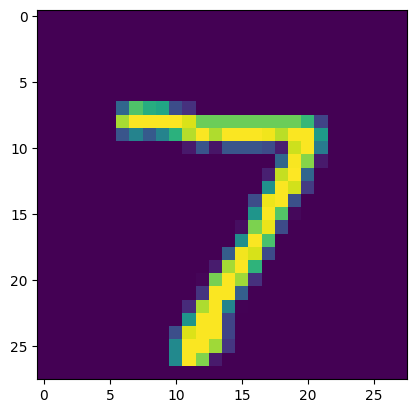

The prediction for this image is: 7.0


In [ ]:
# Test Predictions
plt.imshow(x_test[0])
plt.show()
pred = (y_test_pred[0])
print('The prediction for this image is: {}'.format(pred))

In [ ]:
# Use 10 neighboor to compute the predictions' class(k=10).
y_test_pred = net.predict_labels(dists, k=10)

num_test = x_test.shape[0]
#########################################################################
# TODO: Compute Accuracy of the 10-NN classifier(must be close to ~28 %)#
#########################################################################
num_correct = None

accuracy = None
# Count how many predictions match the true labels
num_correct = np.sum(y_test_pred == y_test)

# Compute the accuracy as the proportion of correct predictions
accuracy = num_correct / num_test
#########################################################################
#                         END OF YOUR CODE                              #
#########################################################################
print('Got {} / {} correct => accuracy: {:.3f}'.format(num_correct, num_test, accuracy))

Got 282 / 1000 correct => accuracy: 0.282


**Inline Question 1**
We observe that the accuracy for 1-NN and 10-NN is not the same.

- What is the difference between 1-NN and 10-NN classifier.

$\color{blue}{\textit Your Answer:}$ *fill this in.*
The difference between 1-NN and 10-NN classifiers is that 1-NN uses the nearest training example to decide the class of a test point, while 10-NN uses the 10 closest training examples to vote on the test point's class. 1-NN is more sensitive to noise and prone to overfitting, and 10-NN is more robust to noise and prone to underfitting